In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
electric = pd.read_csv("~/Downloads/Full Eletric Interval 042016.csv", skiprows = 4)
propertyCode = pd.read_excel("~/Downloads/SIMS_Property_List_4-6-2016.xlsx")

### List of codes

In [10]:
codelist = [b[0] for b in electric['Meter'].str.split()]
codes = pd.Series(codelist)

# Graph by name or code

In [3]:
def singleBuilding(name):
    meterdf = electric[electric['Meter'].str.contains(name)]
    meterdf = meterdf.reset_index()
    meterdf.plot(x="Date", y="Usage", figsize=(40, 20))
    plt.ylabel('Usage (kWh)')
    plt.title(meterdf['Meter'][1])

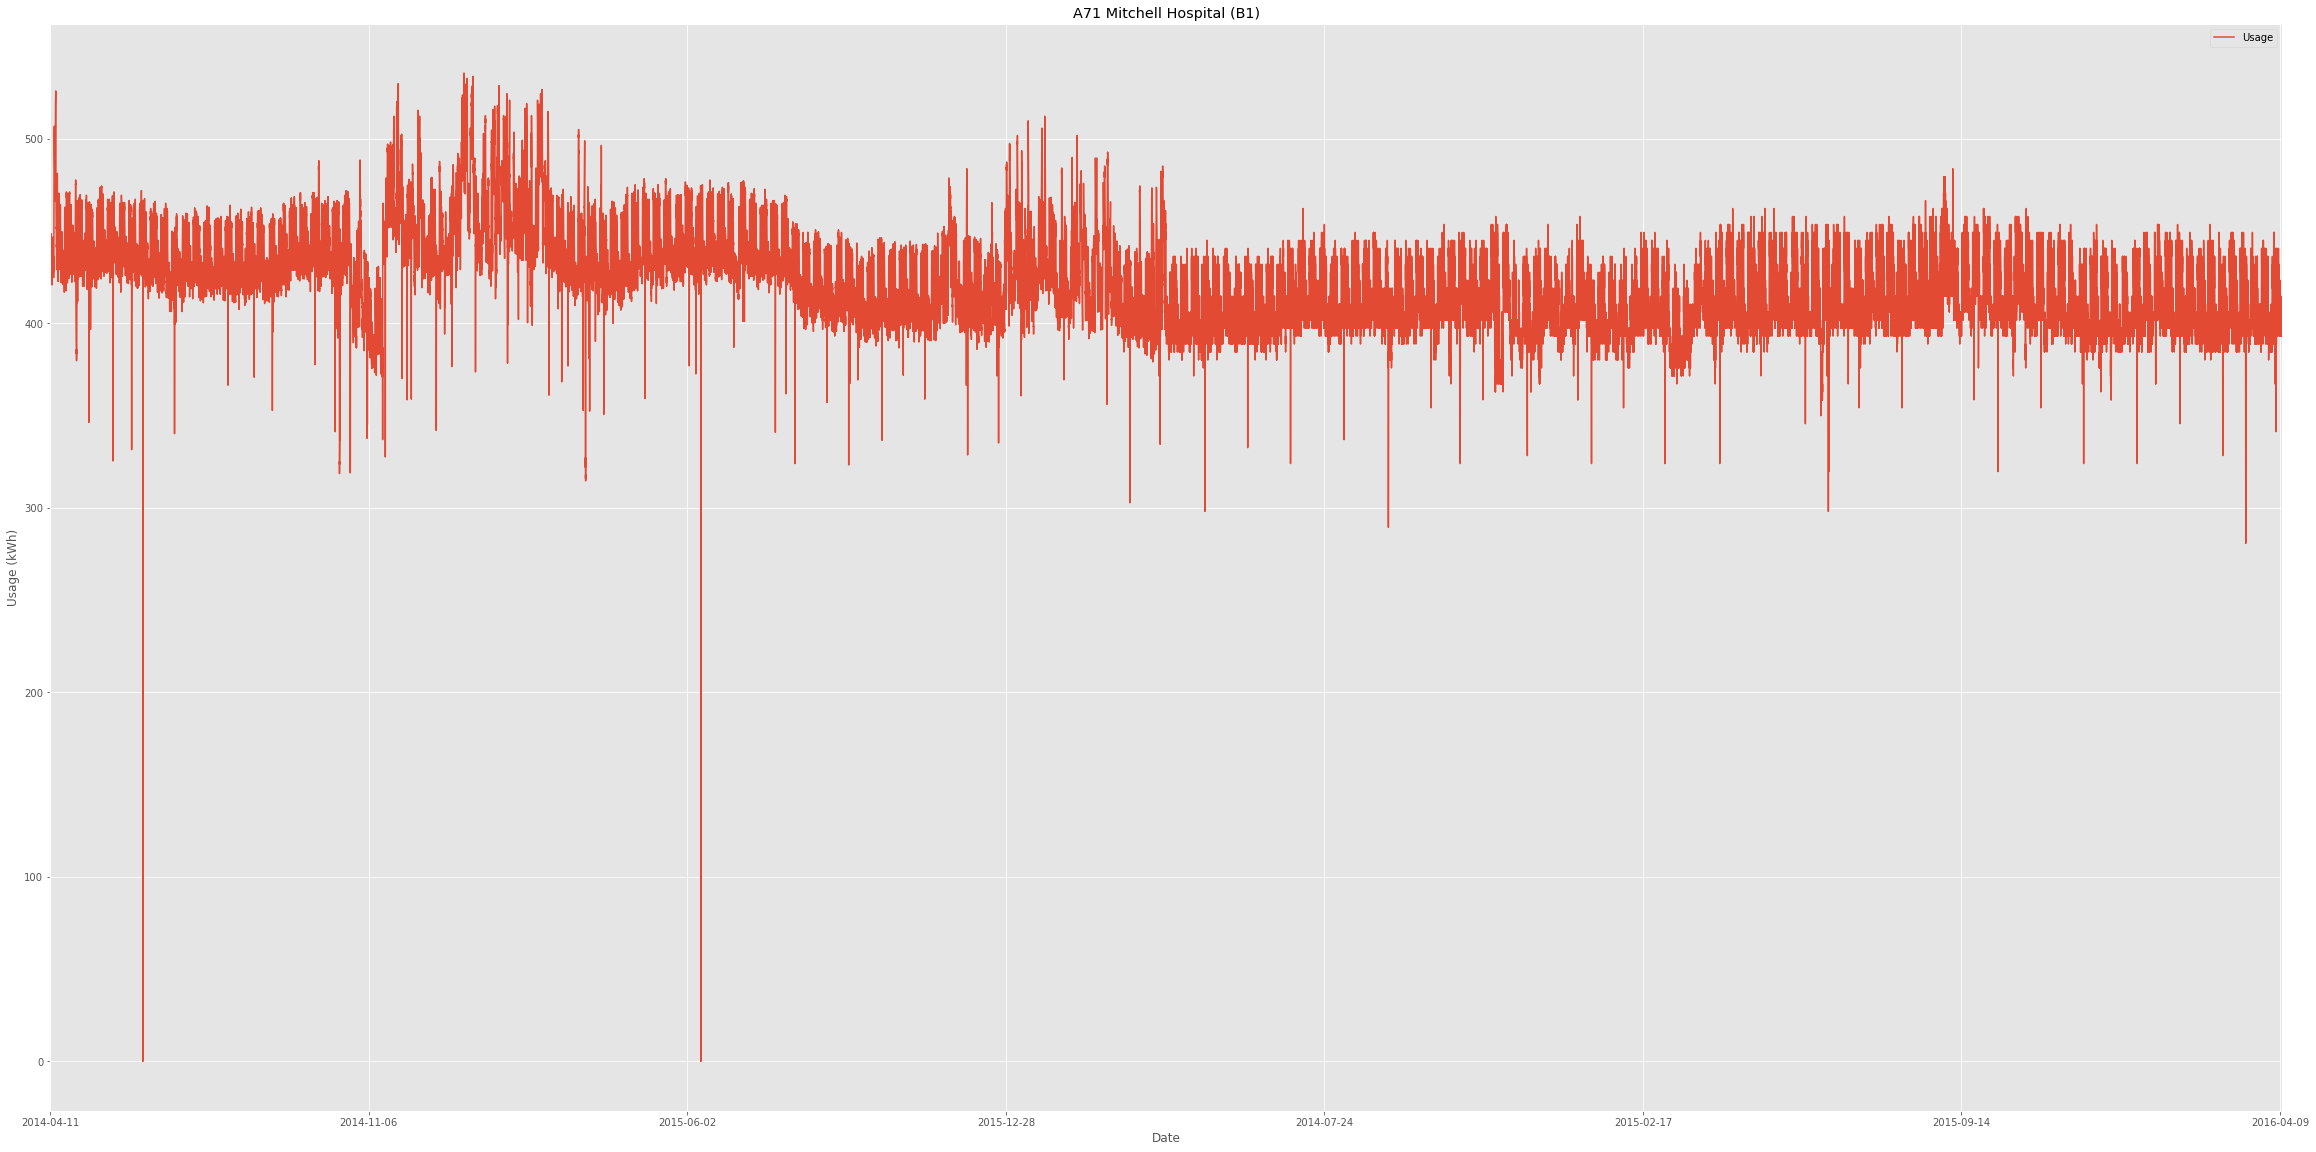

In [5]:
singleBuilding('Mitchell')

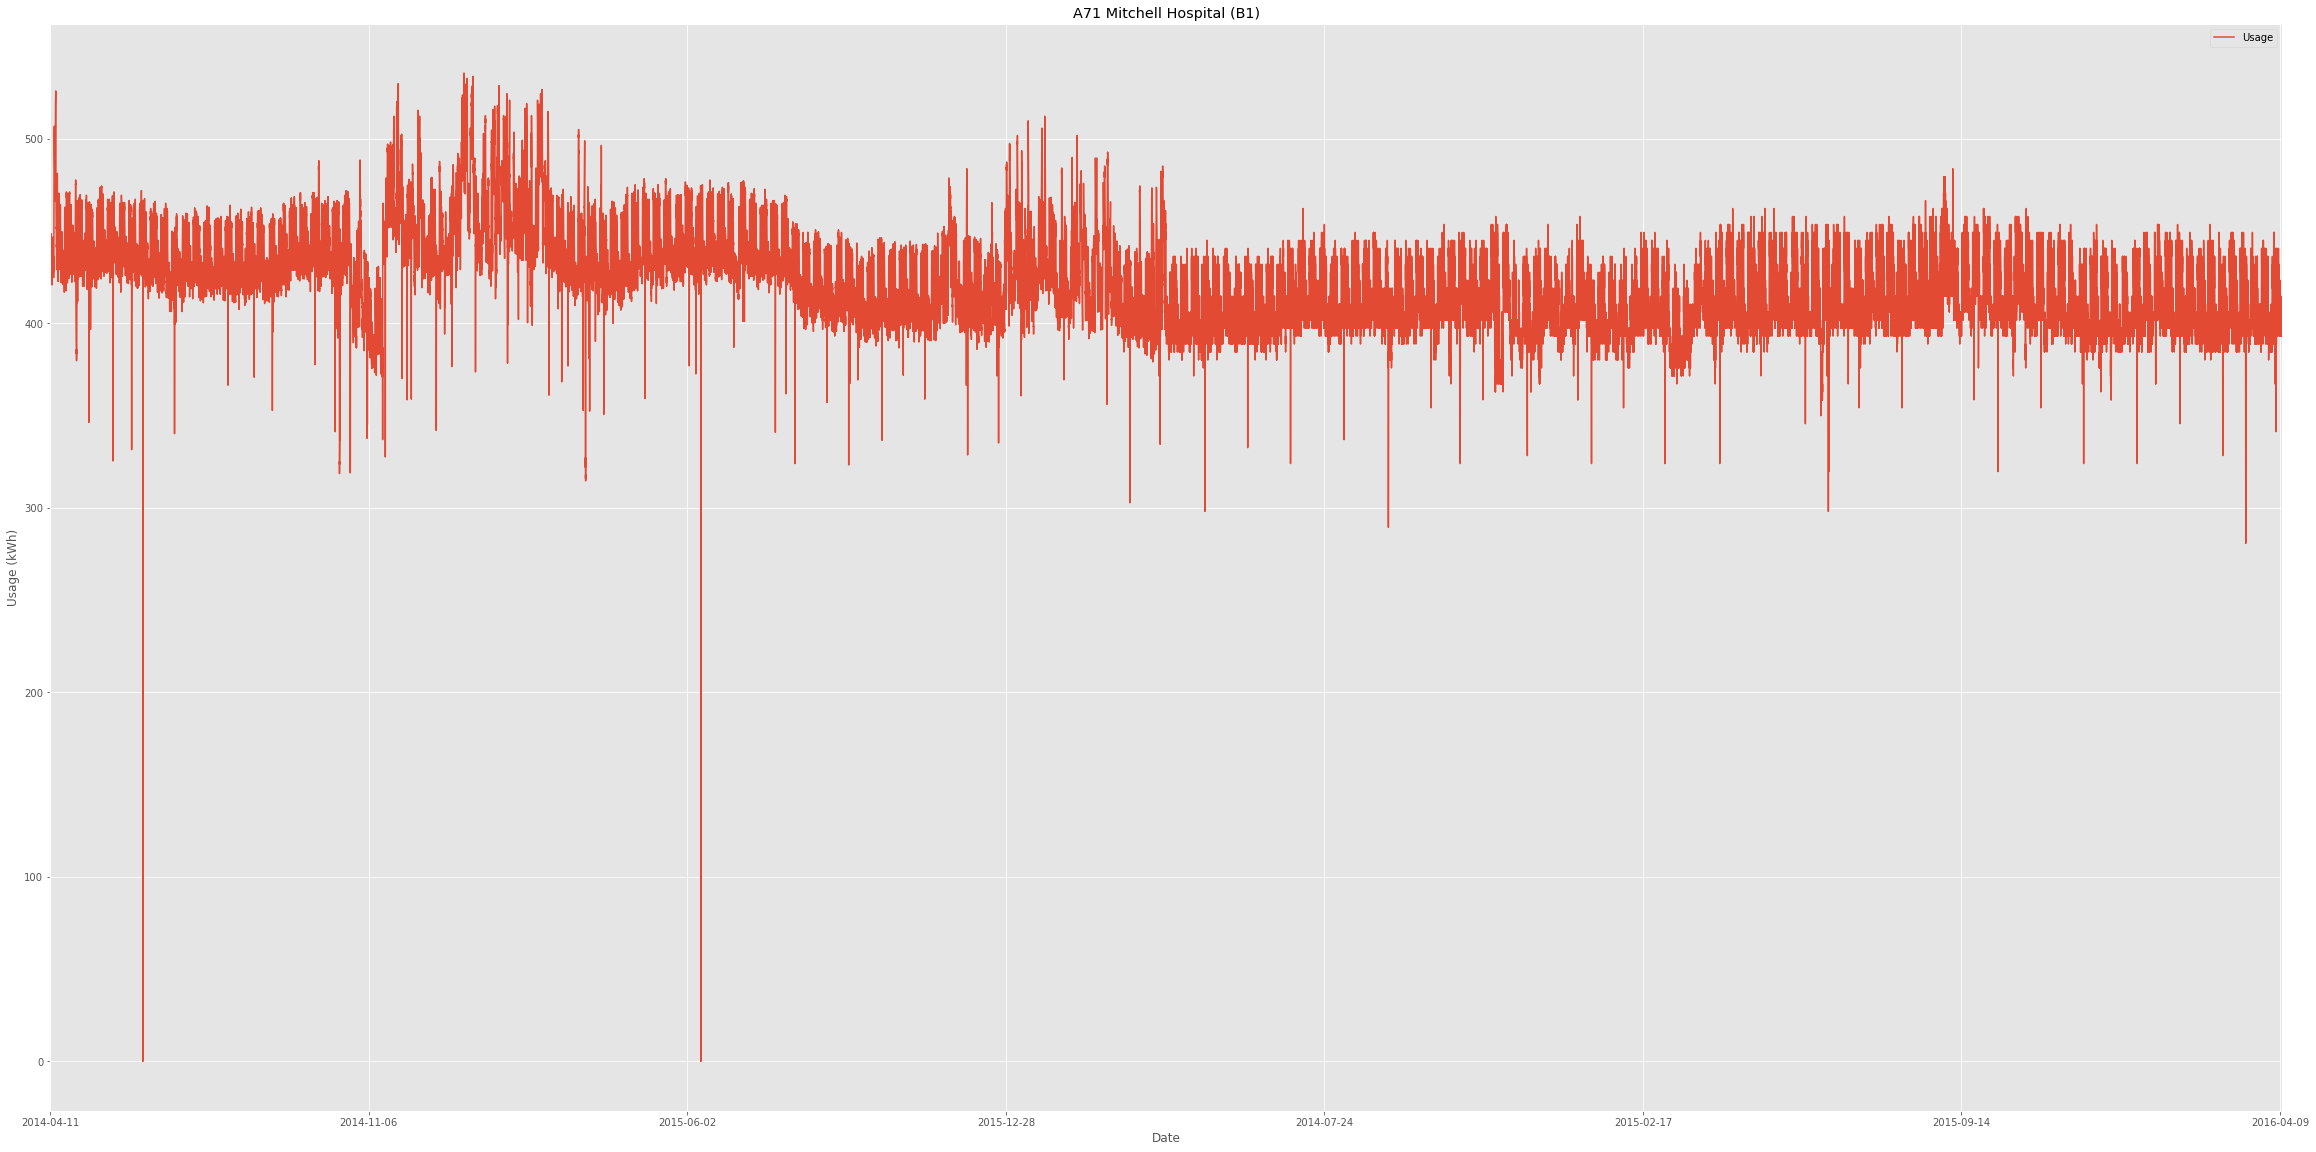

In [6]:
singleBuilding('A71')

# Graph by building type

In [7]:
def groupBuilding(name):
    typedf = propertyCode[propertyCode['Building Use'].str.contains(name, na=False)]
    typeCode = []
    for i in typedf['Property Code']:
        typeCode.append(i)
    typeCode = pd.Series(typeCode)
    newTypedf = electric[codes.isin(typeCode)]
    newTypedf.plot(x="Date", y="Usage", figsize=(40,20))

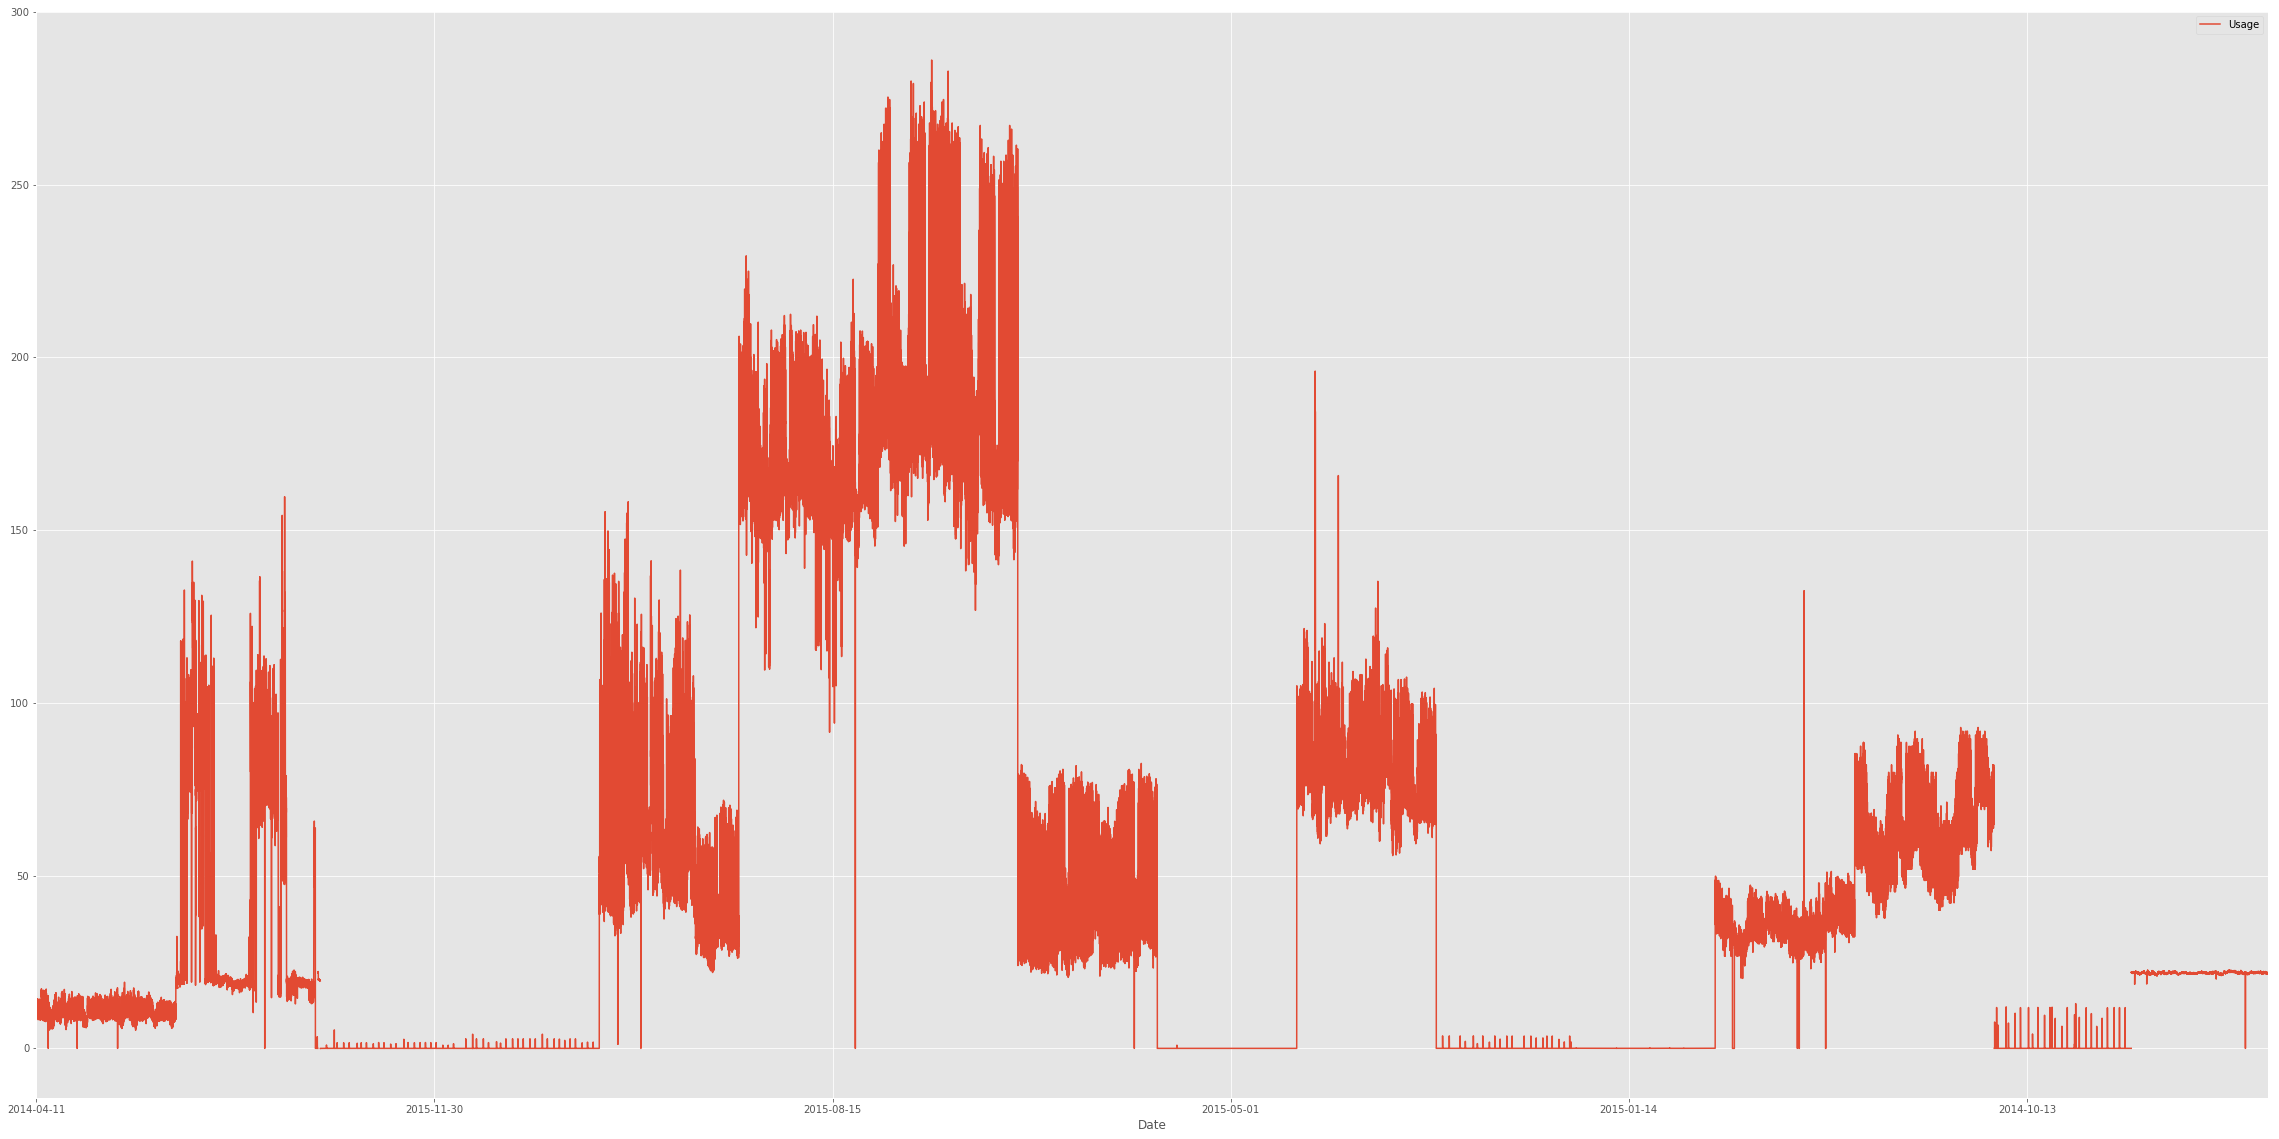

In [11]:
groupBuilding('Dorm')